In [1]:
import pandas as pd

In [4]:
uni_cleaned = pd.read_csv('universities_cleaned.csv')

In [5]:
uni_cleaned.head()

,Unnamed: 0,School_x,business_school,Acceptance Rate,Average Salary,Public(0) or Private(1),Reputation Score,Alumni,Tuition_Fees_17&18,Distance to Nearest City (Miles),Distance Far vs. Close
0,0,University of Pennsylvania (Wharton),Wharton,0.0649,80354,1,4.8,99000.0,53534.0,1.560704,Close
1,1,Washington University in St. Louis (Olin),Olin,0.0970,67115,1,4.1,21000.0,51533.0,235.684727,Far
2,2,University of California-Berkeley (Haas),Haas,0.0430,73302,0,4.6,39000.0,42184.0,11.315188,Close
3,3,Cornell University (Dyson),Dyson,0.0290,74493,1,4.3,NaN,52853.0,178.500330,Far
4,4,University of Michigan (Ross),Ross,0.1200,72268,0,4.6,52000.0,32451.5,35.657174,Close


In [6]:
import seaborn as sns

## Exploratory Data Analysis for Distance Variables

In [9]:
uni_cleaned.describe()

,Unnamed: 0,Acceptance Rate,Average Salary,Public(0) or Private(1),Reputation Score,Alumni,Tuition_Fees_17&18,Distance to Nearest City (Miles)
count,88.000000,88.000000,88.000000,88.000000,54.000000,67.000000,88.000000,88.000000
mean,43.500000,0.436984,58914.818182,0.500000,3.729630,69711.492537,33717.818182,85.813164
std,25.547342,0.228013,8506.707040,0.502865,0.420974,77011.608504,14134.582935,96.301393
min,0.000000,0.029000,34708.000000,0.000000,3.200000,19000.000000,5460.000000,0.641885
25%,21.750000,0.234750,53429.750000,0.000000,3.400000,37000.000000,21899.875000,5.787753
50%,43.500000,0.437500,58430.000000,0.500000,3.650000,48000.000000,31940.500000,56.435758
75%,65.250000,0.620000,63901.500000,1.000000,4.000000,80000.000000,48921.000000,112.807207
max,87.000000,0.886000,80546.000000,1.000000,4.800000,575000.000000,53910.000000,363.630499


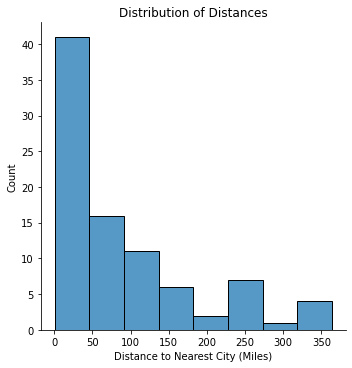

In [10]:
sns.displot(uni_cleaned['Distance to Nearest City (Miles)']).set(title='Distribution of Distances')

[Text(0.5, 1.0, 'Acceptance Rate vs. Distance to Nearest City')]

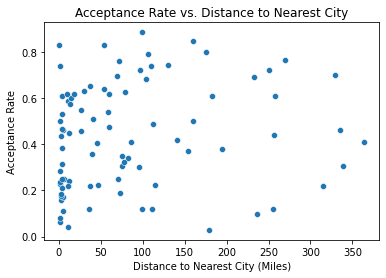

In [11]:
sns.scatterplot(y = 'Acceptance Rate', x= 'Distance to Nearest City (Miles)',data= uni_cleaned).set(title='Acceptance Rate vs. Distance to Nearest City')

<AxesSubplot:xlabel='Distance to Nearest City (Miles)', ylabel='Acceptance Rate'>

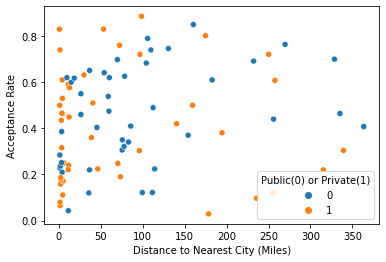

In [12]:
sns.scatterplot(y = 'Acceptance Rate', x= 'Distance to Nearest City (Miles)',hue='Public(0) or Private(1)',data= uni_cleaned)

<AxesSubplot:xlabel='Distance to Nearest City (Miles)', ylabel='Average Salary'>

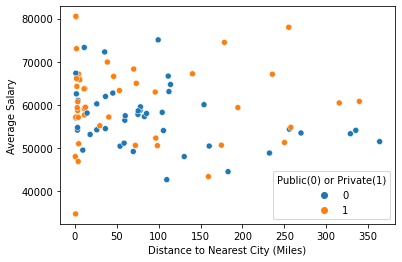

In [13]:
sns.scatterplot(y = 'Average Salary', x= 'Distance to Nearest City (Miles)',hue='Public(0) or Private(1)',data= uni_cleaned)

[Text(0.5, 1.0, 'Average Salary vs Distance to Nearest City')]

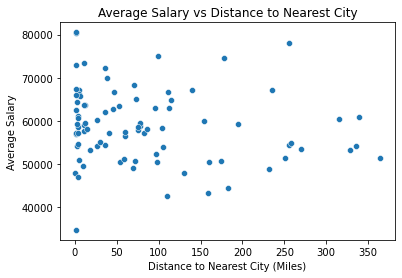

In [14]:
sns.scatterplot(y = 'Average Salary', x= 'Distance to Nearest City (Miles)',data= uni_cleaned).set(title='Average Salary vs Distance to Nearest City')

<AxesSubplot:xlabel='Acceptance Rate', ylabel='Average Salary'>

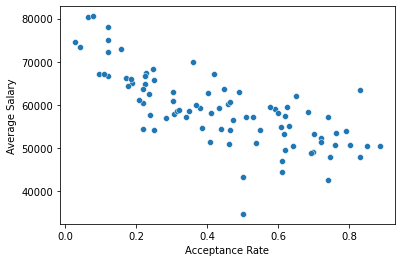

In [15]:
sns.scatterplot(x = 'Acceptance Rate', y= 'Average Salary',data= uni_cleaned)

<AxesSubplot:>

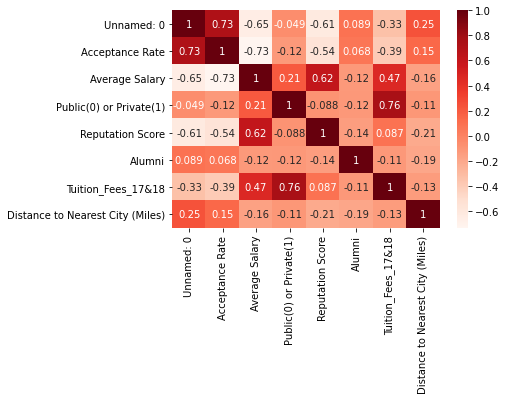

In [16]:
sns.heatmap(uni_cleaned.corr(),cmap='Reds',annot=True)

## Regression Analysis for Distance Variable

In [17]:
import statsmodels.formula.api as smf
X=uni_cleaned['Distance to Nearest City (Miles)']
Y=uni_cleaned['Average Salary']
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Y ~ X', data=uni_cleaned)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.206
Date:                Sun, 05 Dec 2021   Prob (F-statistic):              0.141
Time:                        18:02:12   Log-Likelihood:                -919.53
No. Observations:                  88   AIC:                             1843.
Df Residuals:                      86   BIC:                             1848.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.011e+04   1209.343     49.708      0.0

In [18]:
import statsmodels.formula.api as smf
I=uni_cleaned['Distance to Nearest City (Miles)']
D=uni_cleaned['Acceptance Rate']
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('D ~ I', data=uni_cleaned)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      D   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.900
Date:                Sun, 05 Dec 2021   Prob (F-statistic):              0.172
Time:                        18:02:14   Log-Likelihood:                 6.6927
No. Observations:                  88   AIC:                            -9.385
Df Residuals:                      86   BIC:                            -4.431
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4071      0.032     12.538      0.0

In [19]:
import numpy as np

In [20]:
uni_cleaned['ln_Distance'] = np.log(uni_cleaned['Distance to Nearest City (Miles)'])

In [21]:
uni_cleaned['ln_AccRate'] = np.log(uni_cleaned['Acceptance Rate'])

In [22]:
uni_cleaned['ln_AvgSal'] = np.log(uni_cleaned['Average Salary'])

## Natural Log Regression Model for Distance

In [23]:
import statsmodels.formula.api as smf
In=uni_cleaned['ln_Distance']
De=uni_cleaned['Acceptance Rate']
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('De ~ In', data=uni_cleaned)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     De   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     5.150
Date:                Sun, 05 Dec 2021   Prob (F-statistic):             0.0258
Time:                        18:02:26   Log-Likelihood:                 8.2901
No. Observations:                  88   AIC:                            -12.58
Df Residuals:                      86   BIC:                            -7.625
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3320      0.052      6.386      0.0

In [24]:
import statsmodels.formula.api as smf
Dist_Ind=uni_cleaned['Distance to Nearest City (Miles)']
lnSal_Dep=uni_cleaned['ln_AvgSal']
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('lnSal_Dep ~ Dist_Ind', data=uni_cleaned)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              lnSal_Dep   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.046
Date:                Sun, 05 Dec 2021   Prob (F-statistic):              0.156
Time:                        18:02:28   Log-Likelihood:                 45.686
No. Observations:                  88   AIC:                            -87.37
Df Residuals:                      86   BIC:                            -82.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9933      0.021    527.308      0.0